# Résumé du notebook
summary = """
- Chargement des données : df = pd.read_csv('Dataset2.csv').
- Préparation : séparation features / target (majoritairement 'target', plus tard 'sex' => incohérence possible).
- Prétraitement : StandardScaler défini (scaler) et utilisé pour créer scaled_df.
- Split des données : A_split (80-20) et B_split (70-30).
- Classifieurs implémentés :
    - KNN (train_knn et usages directs avec KNeighborsClassifier)
    - RandomForest (train_random_forest)
    - DecisionTree (train_decision_tree)
    - SVM (train_svm, train_svm_rbf, train_svm_poly ; tests de kernels et standardisation)
    - Boosting/Bagging : BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
- Fonctions utilitaires :
    - plot_confusion_matrix (définie / redéfinie dans plusieurs cellules)
    - comparative_analysis (évalue plusieurs modèles)
    - comparative_visualization (barplot des accuracies)
- Expérimentations :
    - Comparaisons KNN vs RandomForest (avec/ sans scaling, splits 80-20 et 70-30)
    - Tests SVM (linear vs rbf, standardisé ou non)
    - Comparaisons des algorithmes de boosting et vote (hard/soft)
- Visualisations : barplots d'accuracies, heatmaps de matrices de confusion.
- Remarques importantes :
    - Certaines fonctions / variables sont redéfinies dans différentes cellules (ex. plot_confusion_matrix, scaler, shuffled_df).
    - Vérifier la colonne cible ('target' vs 'sex') pour cohérence.
    - Les cellules partagent X_train/X_test/etc. : l'état dépend de l'ordre d'exécution.
"""
print(summary)

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Dataset2.csv')
df
print(df.isnull().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [3]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
features = df.drop('target', axis=1)
target = df['target']

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# Exemple de différents paramètres à tester



def train_knn(X_train, y_train, X_test, y_test):
    params = [
        {'n_neighbors': 3, 'weights': 'uniform'},
        {'n_neighbors': 5, 'weights': 'uniform'},
        {'n_neighbors': 7, 'weights': 'distance'},
        {'n_neighbors': 9, 'weights': 'distance'}
    ]

    results = []

    for p in params:
        model = KNeighborsClassifier(**p)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        results.append((p, acc))
        
        print(f"Parameters: {p}")
        print(f"Accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("-"*50)

    # Résumé des performances
    print("Résumé des performances:")
    for p, acc in results:
        print(f"{p} => Accuracy: {acc:.4f}")

    return results


In [6]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [7]:
from sklearn.model_selection import train_test_split
def A_split(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


def B_split(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test


In [8]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

def train_random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return y_pred, accuracy



(952, 11) (238, 11) (952,) (238,)
Random Forest Classifier Accuracy (80-20 split): 0.9453781512605042
KNN Classifier Accuracy (80-20 split): 0.8865546218487395


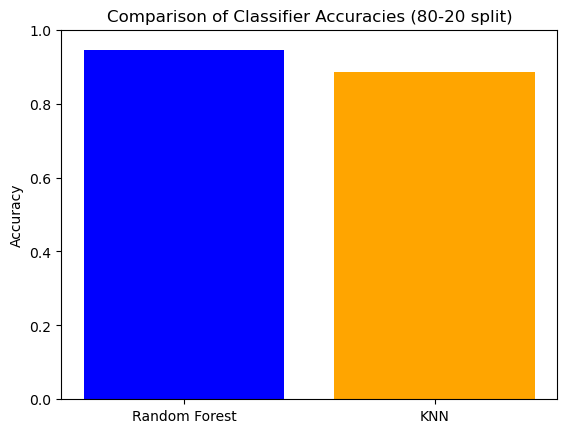

In [9]:
#KNN+RandomForest +80-20 split + scaling

scaled_data = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_data, columns=features.columns)

X_train, X_test, y_train, y_test = A_split(scaled_df, target) # 80-20 split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_pred, accuracy1 = train_random_forest(X_train, y_train, X_test , y_test)
print("Random Forest Classifier Accuracy (80-20 split):", accuracy1)

accuracy = KNeighborsClassifier(n_neighbors=5, weights='uniform')
accuracy.fit(X_train, y_train)
y_pred = accuracy.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Classifier Accuracy (80-20 split):", accuracy)

#graphe de comparaison des deux modeles
import matplotlib.pyplot as plt

models = ['Random Forest', 'KNN']
accuracies = [accuracy1, accuracy]
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies (80-20 split)')
plt.ylim(0, 1)
plt.show()

In [13]:
#random forest + knn 70-30 split without  scaling
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_pred, accuracy1 = train_random_forest(X_train, y_train, X_test, y_test)
print("Random Forest Classifier Accuracy (70-30 split):", accuracy1)

accuracy = train_knn(X_train, y_train, X_test, y_test)
print("KNN Classifier Accuracy (70-30 split):", accuracy)






(833, 11) (357, 11) (833,) (357,)
Random Forest Classifier Accuracy (70-30 split): 0.9355742296918768
Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.6919
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       154
           1       0.73      0.72      0.73       203

    accuracy                           0.69       357
   macro avg       0.69      0.69      0.69       357
weighted avg       0.69      0.69      0.69       357

Confusion Matrix:
 [[101  53]
 [ 57 146]]
--------------------------------------------------
Parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.7451
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       154
           1       0.79      0.76      0.77       203

    accuracy                           0.75       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.75      0.75      0.75       357

Confusion M

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
def train_decision_tree(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier(random_state=42, max_depth=5 )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return y_pred, accuracy

In [ ]:
#shuffle
from sklearn.utils import shuffle
shuffled_df = shuffle(df, random_state=42)





In [ ]:
#SVM simple
from sklearn.svm import SVC
def train_svm(X_train, y_train, X_test, y_test):
    model = SVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return y_pred, accuracy

In [ ]:
#SVM with rbf kernel
from sklearn.svm import SVC
def train_svm_rbf(X_train, y_train, X_test, y_test):
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return y_pred, accuracy


In [ ]:
#SVM with polynomial kernel
from sklearn.svm import SVC
def train_svm_poly(X_train, y_train, X_test, y_test, degree=2):
    model = SVC(kernel='poly', degree=degree)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return y_pred, accuracy

In [ ]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
#comparative analysis function
def comparative_analysis(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model_func in models.items():
        y_pred, accuracy = model_func(X_train, y_train, X_test, y_test)
        results[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.4f}")
    return results



In [ ]:
#comparative visualization function
def comparative_visualization(results):
    names = list(results.keys())
    accuracies = list(results.values())
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=names, y=accuracies)
    plt.title('Model Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()



(952, 11) (238, 11) (952,) (238,)
Random Forest Classifier Accuracy (80-20 split): 0.9201680672268907
Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.8445
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       126
           1       0.86      0.80      0.83       112

    accuracy                           0.84       238
   macro avg       0.85      0.84      0.84       238
weighted avg       0.85      0.84      0.84       238

Confusion Matrix:
 [[111  15]
 [ 22  90]]
--------------------------------------------------
Parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.8529
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       126
           1       0.85      0.83      0.84       112

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238

Confusion M

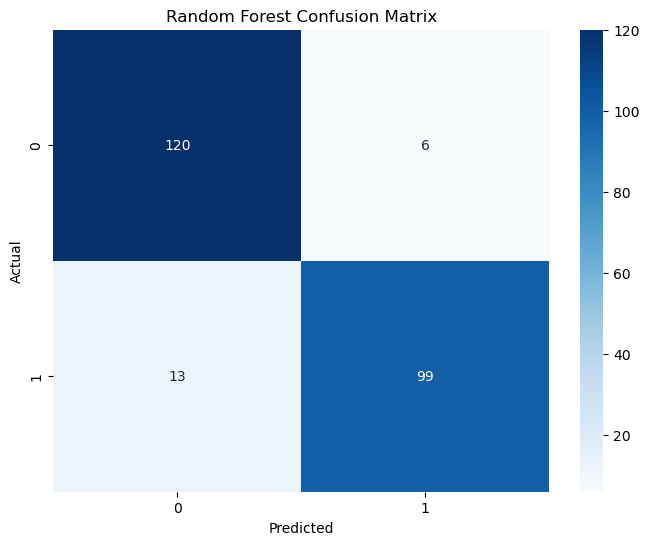

Decision Tree Classifier Accuracy (80-20 split): 0.9159663865546218


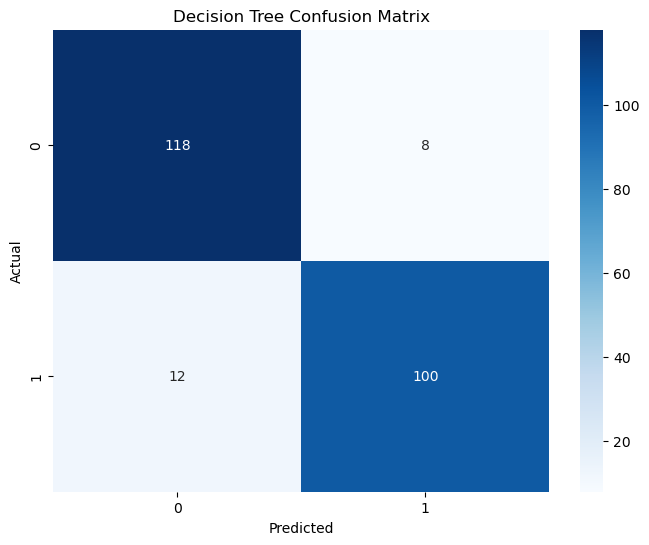

In [ ]:

#KNN + scaling + 80-20 split + random forest + decision tree + shuffle 
from sklearn.utils import shuffle
shuffled_df = shuffle(df, random_state=42)
features = shuffled_df.drop('target', axis=1)
target = shuffled_df['target']
scaled_data = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_data, columns=features.columns)
X_train, X_test, y_train, y_test = A_split(scaled_df, target) # 80-20 split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_pred, accuracy = train_random_forest(X_train, y_train, X_test , y_test)
print("Random Forest Classifier Accuracy (80-20 split):", accuracy)
accuracy = train_knn(X_train, y_train, X_test,y_test)
print("KNN Classifier Accuracy (80-20 split):", accuracy)
#visualization using confusion matrix matplotlib
plot_confusion_matrix(y_test, y_pred, title='Random Forest Confusion Matrix')
y_pred_dt, accuracy_dt = train_decision_tree(X_train, y_train, X_test, y_test)
print("Decision Tree Classifier Accuracy (80-20 split):", accuracy_dt)
plot_confusion_matrix(y_test, y_pred_dt, title='Decision Tree Confusion Matrix')
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ Accuracy du Voting Boosting : 0.8613
Simple Boosting accuracy : 0.7773
AdaBoost accuracy : 0.8403


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting accuracy : 0.8697


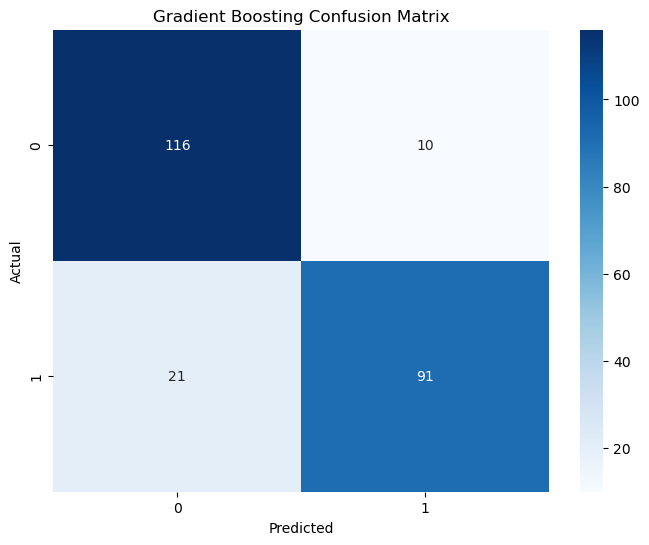

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
#bagging classifier
# === 1️⃣ Simple Boosting (concept simulé avec petits arbres) ===
simple_boost = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # ✅ changement ici
    n_estimators=3,
    random_state=42
)

# === 2️⃣ Adaptive Boosting ===
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # ✅ changement ici aussi
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# === 3️⃣ Gradient Boosting ===
gradboost = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# === Combinaison par Vote ===
voting = VotingClassifier(
    estimators=[
        ('simple', simple_boost),
        ('adaboost', adaboost),
        ('gradboost', gradboost)
    ],
    voting='soft'
)

# === Entraînement ===
voting.fit(X_train, y_train)

# === Prédiction et évaluation ===
y_pred = voting.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy du Voting Boosting : {acc:.4f}")

# === Évaluation individuelle ===
for name, model in [('Simple Boosting', simple_boost), ('AdaBoost', adaboost), ('Gradient Boosting', gradboost)]:
    model.fit(X_train, y_train)
    y_pred_i = model.predict(X_test)
    print(f"{name} accuracy : {accuracy_score(y_test, y_pred_i):.4f}")


plot_confusion_matrix(y_test, y_pred_i, title=f'{name} Confusion Matrix')




=== COMPARAISON DES ALGORITHMES DE BOOSTING ===
Simple Boosting accuracy : 0.7871


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost accuracy : 0.8431
Gradient Boosting accuracy : 0.8739


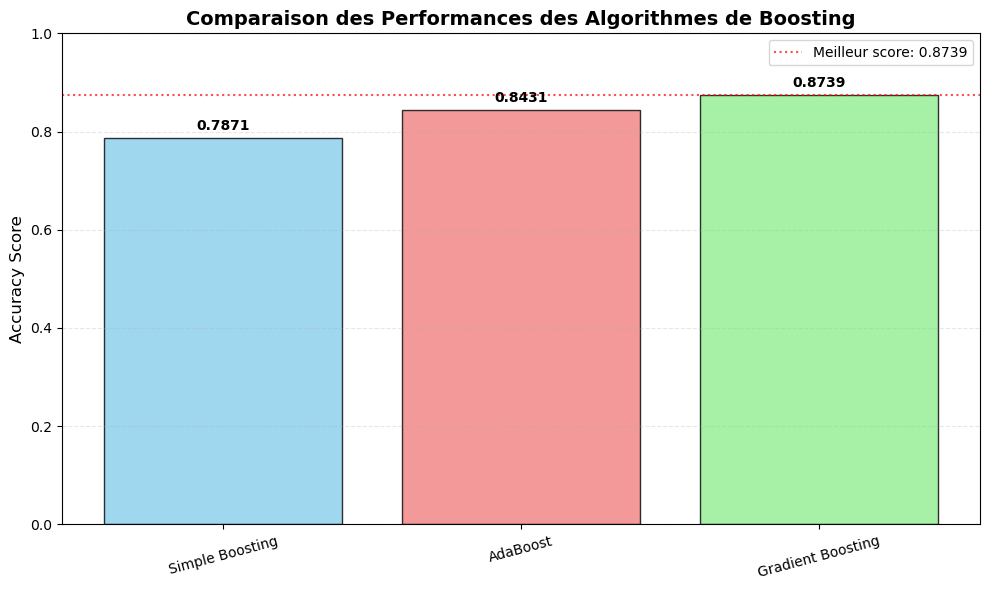


=== CLASSEMENT DES ALGORITHMES ===
1. Gradient Boosting: 0.8739
2. AdaBoost: 0.8431
3. Simple Boosting: 0.7871

=== ANALYSE COMPARATIVE ===
Amélioration AdaBoost vs Simple: +7.12%
Amélioration Gradient vs AdaBoost: +3.65%
Amélioration Globale (Gradient vs Simple): +11.03%


In [ ]:
# Comparative analysis of boosting algorithms
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# === 1️⃣ Simple Boosting (concept simulé avec petits arbres) ===
simple_boost = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=3,
    random_state=42
)

# === 2️⃣ Adaptive Boosting ===
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# === 3️⃣ Gradient Boosting ===
gradboost = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# === Entraînement et évaluation comparative ===
models = [('Simple Boosting', simple_boost), ('AdaBoost', adaboost), ('Gradient Boosting', gradboost)]
accuracies = []

print("=== COMPARAISON DES ALGORITHMES DE BOOSTING ===")
for name, model in models:
    model.fit(X_train, y_train)
    y_pred_i = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_i)
    accuracies.append(accuracy)
    print(f"{name} accuracy : {accuracy:.4f}")
    # plot_confusion_matrix(y_test, y_pred_i, title=f'{name} Confusion Matrix')

# === GRAPHIQUE COMPARATIF DES ACCURACIES ===
plt.figure(figsize=(10, 6))

# Création du graphique à barres
model_names = [name for name, _ in models]
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8, edgecolor='black')

# Ajout des valeurs sur les barres
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold')

# Personnalisation du graphique
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Comparaison des Performances des Algorithmes de Boosting', fontsize=14, fontweight='bold')
plt.ylim(0, 1.0)  # L'accuracy va de 0 à 1
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Amélioration de l'apparence
plt.xticks(rotation=15)
plt.tight_layout()

# Ajout d'une ligne horizontale pour référence
plt.axhline(y=max(accuracies), color='red', linestyle=':', alpha=0.7, 
            label=f'Meilleur score: {max(accuracies):.4f}')
plt.legend()

plt.show()

# === AFFICHAGE DU CLASSEMENT ===
print("\n=== CLASSEMENT DES ALGORITHMES ===")
sorted_models = sorted(zip(model_names, accuracies), key=lambda x: x[1], reverse=True)
for i, (name, acc) in enumerate(sorted_models, 1):
    print(f"{i}. {name}: {acc:.4f}")

# === ANALYSE DE L'AMÉLIORATION ===
print(f"\n=== ANALYSE COMPARATIVE ===")
print(f"Amélioration AdaBoost vs Simple: {((accuracies[1]-accuracies[0])/accuracies[0]*100):+.2f}%")
print(f"Amélioration Gradient vs AdaBoost: {((accuracies[2]-accuracies[1])/accuracies[1]*100):+.2f}%")
print(f"Amélioration Globale (Gradient vs Simple): {((accuracies[2]-accuracies[0])/accuracies[0]*100):+.2f}%")

SVM-LINEAR (Non standardisé) → Accuracy : 0.8515
SVM-LINEAR (Standardisé) → Accuracy : 0.8515
SVM-RBF (Non standardisé) → Accuracy : 0.7339
SVM-RBF (Standardisé) → Accuracy : 0.8683


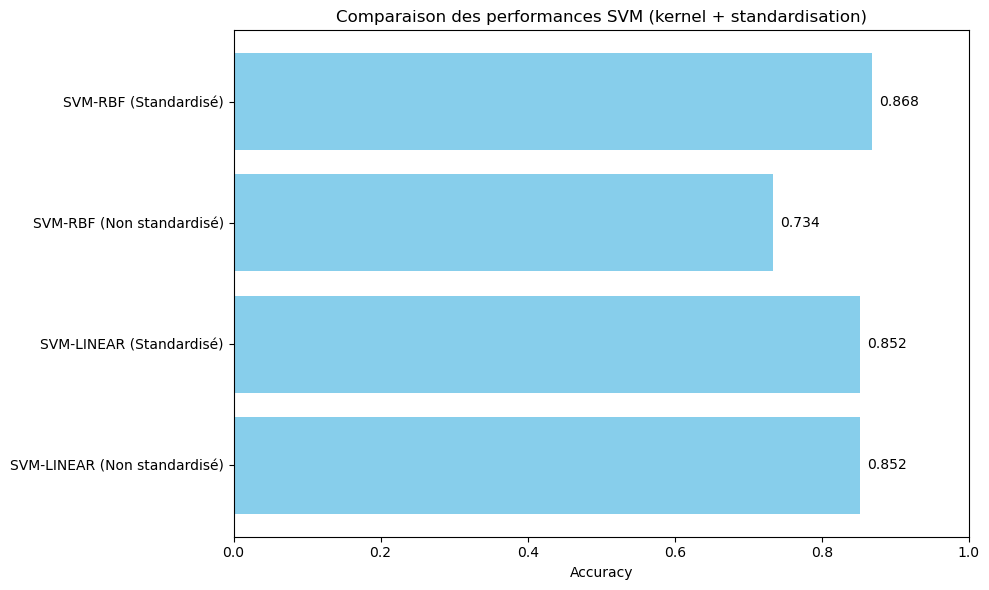

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# === Séparer en train/test ===
X_train, X_test, y_train, y_test = B_split(features, target) # 70-30 split

# === Kernels à tester ===
kernels = ['linear', 'rbf']

# === Résultats à stocker ===
results = []

# === Boucles sur kernel et standardisation ===
for kernel in kernels:
    for standardize in [False, True]:
        
        # Copie des données
        X_train_temp, X_test_temp = X_train.copy(), X_test.copy()
        
        # Standardisation si demandée
        if standardize:
            scaler = StandardScaler()
            X_train_temp = scaler.fit_transform(X_train_temp)
            X_test_temp = scaler.transform(X_test_temp)
            label = f"SVM-{kernel.upper()} (Standardisé)"
        else:
            label = f"SVM-{kernel.upper()} (Non standardisé)"
        
        # Entraînement du modèle
        model = SVC(kernel=kernel)
        model.fit(X_train_temp, y_train)
        y_pred = model.predict(X_test_temp)
        
        # Calcul de la précision
        acc = accuracy_score(y_test, y_pred)
        results.append((label, acc))
        print(f"{label} → Accuracy : {acc:.4f}")

# === Transformation en DataFrame pour affichage ===
results_df = pd.DataFrame(results, columns=['Configuration', 'Accuracy'])

# === Tracé du graphique ===
plt.figure(figsize=(10,6))
plt.barh(results_df['Configuration'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparaison des performances SVM (kernel + standardisation)')
plt.xlim(0, 1)
for index, value in enumerate(results_df['Accuracy']):
    plt.text(value + 0.01, index, f"{value:.3f}", va='center')
plt.tight_layout()
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ HARD → Accuracy : 0.8543


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ SOFT → Accuracy : 0.8739


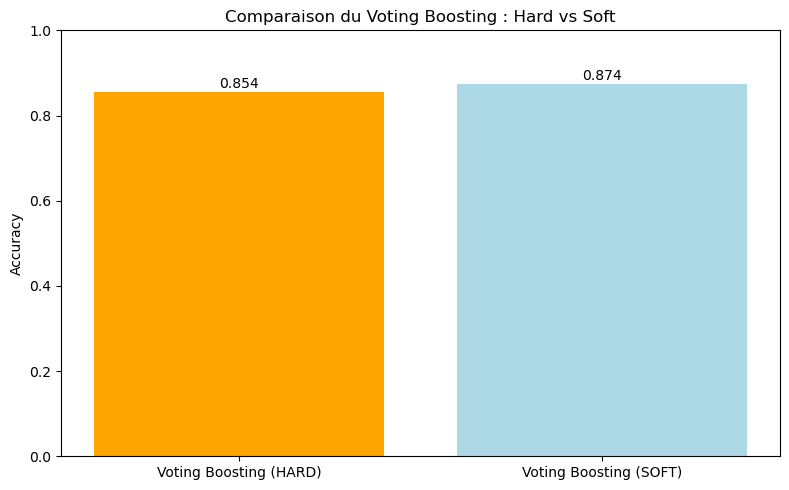

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# === Séparation en train/test ===
X_train, X_test, y_train, y_test = B_split(features, target) # 70-30 split

# === Définir les modèles Boosting ===
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

gradboost = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# === Liste pour stocker les résultats ===
results = []

# === Boucle sur les deux modes de vote ===
for vote_type in ['hard', 'soft']:
    voting = VotingClassifier(
        estimators=[
            ('adaboost', adaboost),
            ('gradboost', gradboost)
        ],
        voting=vote_type
    )
    
    # Entraînement du modèle
    voting.fit(X_train, y_train)
    
    # Prédiction et précision
    y_pred = voting.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    results.append((f"Voting Boosting ({vote_type.upper()})", acc))
    print(f"✅ {vote_type.upper()} → Accuracy : {acc:.4f}")

# === Conversion des résultats en DataFrame ===
results_df = pd.DataFrame(results, columns=['Configuration', 'Accuracy'])

# === Affichage graphique ===
plt.figure(figsize=(8,5))
plt.bar(results_df['Configuration'], results_df['Accuracy'], color=['orange', 'lightblue'])
plt.ylabel('Accuracy')
plt.title('Comparaison du Voting Boosting : Hard vs Soft')
plt.ylim(0, 1)
for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv('Dataset2.csv')
X = df.drop('sex', axis=1)
y = df['sex']

#knnclasifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print("KNN Classifier Accuracy:", accuracy1)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

KNN Classifier Accuracy: 0.7254901960784313
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       177
           1       0.72      0.74      0.73       180

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix:
 [[125  52]
 [ 46 134]]


In [ ]:
#randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Classifier Accuracy: 0.9215686274509803
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       177
           1       0.93      0.91      0.92       180

    accuracy                           0.92       357
   macro avg       0.92      0.92      0.92       357
weighted avg       0.92      0.92      0.92       357

Confusion Matrix:
 [[165  12]
 [ 16 164]]


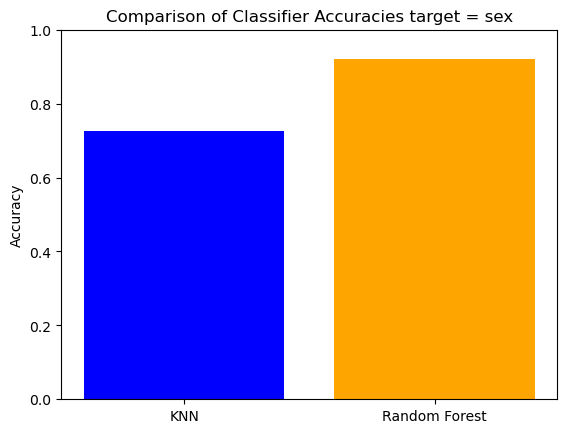

In [ ]:
#comparaison entre rf et knn
import matplotlib.pyplot as plt
models = ['KNN', 'Random Forest']
accuracies = [accuracy1, accuracy]
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies target = sex')
plt.ylim(0, 1)
plt.show()

=== COMPARAISON DES MODÈLES BAGGING ET VOTING ===
Bagging Decision Tree     : 0.8739
Bagging Logistic Regression : 0.8235
Bagging SVM               : 0.7423
Voting Hard               : 0.8543
Voting Soft               : 0.8459


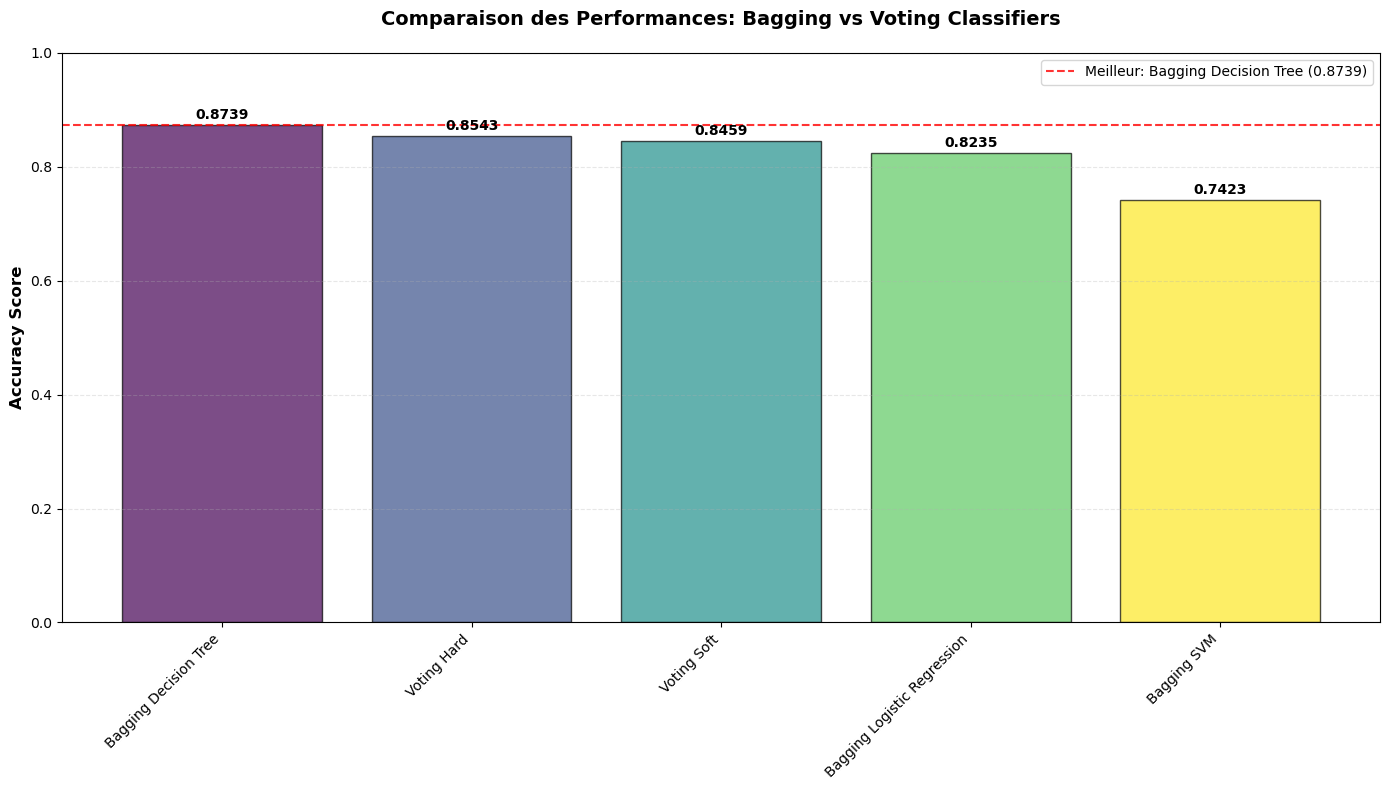


ANALYSE DÉTAILLÉE DES PERFORMANCES

🏆 CLASSEMENT FINAL DES MODÈLES :
 1. Bagging Decision Tree     : 0.8739
 2. Voting Hard               : 0.8543
 3. Voting Soft               : 0.8459
 4. Bagging Logistic Regression : 0.8235
 5. Bagging SVM               : 0.7423

📈 ANALYSE D'AMÉLIORATION :
Bagging Decision Tree     : +0.00% vs référence
Voting Hard               : -2.24% vs référence
Voting Soft               : -3.21% vs référence
Bagging Logistic Regression : -5.77% vs référence
Bagging SVM               : -15.06% vs référence

🔍 MATRICE DE CORRÉLATION DES PRÉDICTIONS :


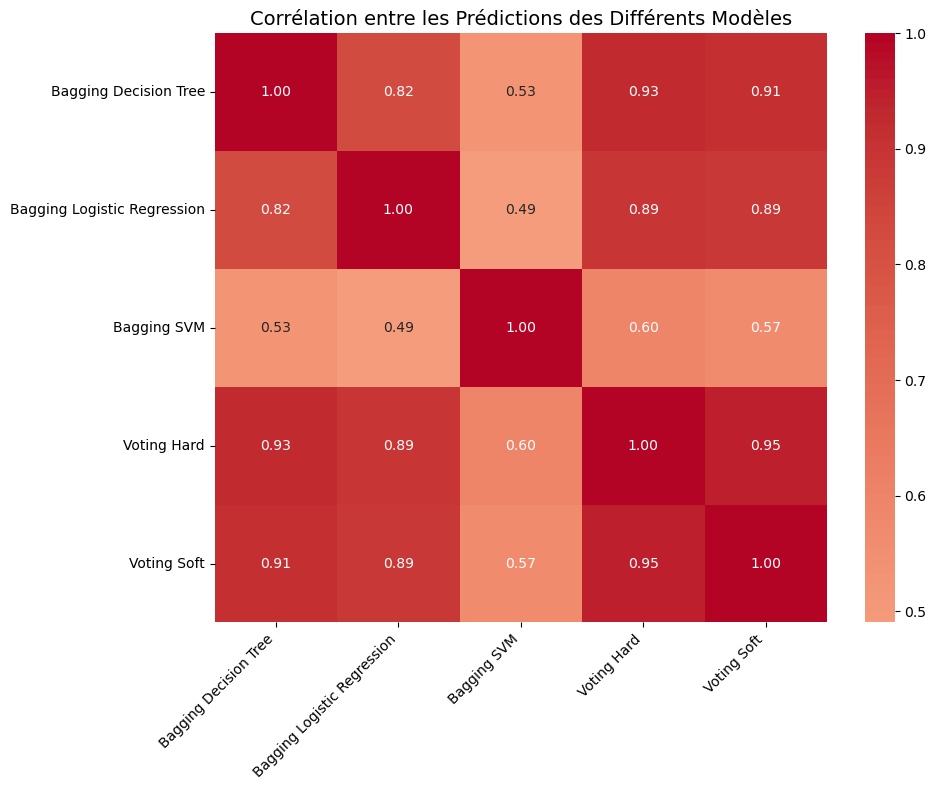


📊 RAPPORT DE CLASSIFICATION DU MEILLEUR MODÈLE (Bagging Decision Tree) :
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       177
           1       0.89      0.86      0.87       180

    accuracy                           0.87       357
   macro avg       0.87      0.87      0.87       357
weighted avg       0.87      0.87      0.87       357



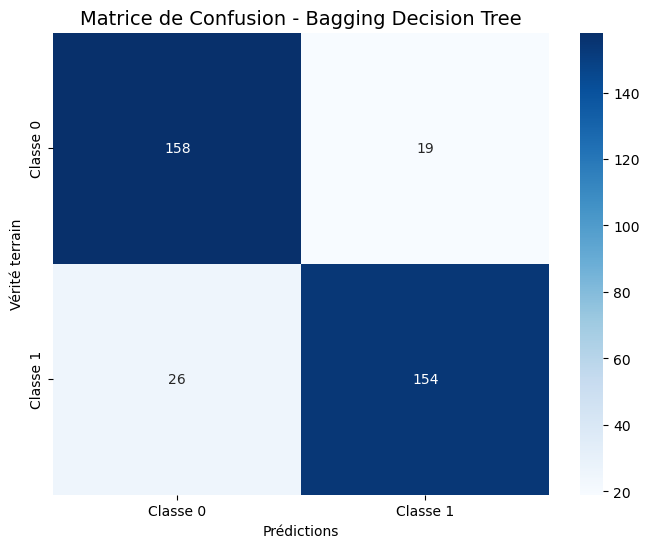


🎯 RECOMMANDATION FINALE
🏆 MEILLEUR MODÈLE SÉLECTIONNÉ : Bagging Decision Tree
📊 ACCURACY : 0.8739

🔍 DIVERSITÉ DES MODÈLES :
Les modèles avec une corrélation faible entre leurs prédictions
sont complémentaires et améliorent les performances du voting.

💡 CODE POUR UTILISER LE MEILLEUR MODÈLE :

# Le meilleur modèle est un Bagging Classifier
best_model = all_models['Bagging Decision Tree']
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_new_data)
    

COMPARAISON AVEC MODÈLES SIMPLES (SANS BAGGING)
Decision Tree        : Simple=0.8263 | Bagging=0.8739 | Amélioration=+5.76%
Logistic Regression  : Simple=0.8179 | Bagging=0.8235 | Amélioration=+0.68%


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM                  : Simple=0.7339 | Bagging=0.7423 | Amélioration=+1.15%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === 1️⃣ DÉFINITION DES MODÈLES DE BASE ===
base_models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# === 2️⃣ CRÉATION DES BAGGING CLASSIFIERS ===
bagging_models = {}

for name, base_model in base_models.items():
    bagging_models[f'Bagging {name}'] = BaggingClassifier(
        estimator=base_model,
        n_estimators=50,  # 50 modèles dans l'ensemble
        max_samples=0.8,  # 80% des données pour chaque modèle
        max_features=0.8, # 80% des features pour chaque modèle
        random_state=42,
        n_jobs=-1  # Utiliser tous les cœurs disponibles
    )

# === 3️⃣ VOTING CLASSIFIER ===
# Voting hard (majorité) et soft (moyenne des probabilités)
voting_hard = VotingClassifier(
    estimators=[(name, model) for name, model in bagging_models.items()],
    voting='hard'
)

voting_soft = VotingClassifier(
    estimators=[(name, model) for name, model in bagging_models.items()],
    voting='soft'
)

# Ajout des voting classifiers à la liste des modèles
all_models = {**bagging_models, 
              'Voting Hard': voting_hard, 
              'Voting Soft': voting_soft}

# === 4️⃣ ENTRAÎNEMENT ET ÉVALUATION ===
results = {}
predictions = {}

print("=== COMPARAISON DES MODÈLES BAGGING ET VOTING ===")
print("=" * 60)

for name, model in all_models.items():
    # Entraînement
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    
    # Calcul de l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name:<25} : {accuracy:.4f}")

# === 5️⃣ GRAPHIQUE COMPARATIF ===
plt.figure(figsize=(14, 8))

# Tri des résultats par performance
sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))
models_names = list(sorted_results.keys())
accuracies = list(sorted_results.values())

# Création du graphique
colors = plt.cm.viridis(np.linspace(0, 1, len(models_names)))
bars = plt.bar(models_names, accuracies, color=colors, alpha=0.7, edgecolor='black')

# Ajout des valeurs sur les barres
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Personnalisation
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Comparaison des Performances: Bagging vs Voting Classifiers', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, min(1.0, max(accuracies) * 1.15))
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Ligne pour le meilleur modèle
best_accuracy = max(accuracies)
best_model = models_names[accuracies.index(best_accuracy)]
plt.axhline(y=best_accuracy, color='red', linestyle='--', alpha=0.8, 
            label=f'Meilleur: {best_model} ({best_accuracy:.4f})')

plt.legend()
plt.tight_layout()
plt.show()

# === 6️⃣ ANALYSE DÉTAILLÉE DES RÉSULTATS ===
print("\n" + "=" * 60)
print("ANALYSE DÉTAILLÉE DES PERFORMANCES")
print("=" * 60)

# Classement final
print("\n🏆 CLASSEMENT FINAL DES MODÈLES :")
for i, (model, acc) in enumerate(sorted_results.items(), 1):
    print(f"{i:2d}. {model:<25} : {acc:.4f}")

# Amélioration par rapport au modèle de base
print(f"\n📈 ANALYSE D'AMÉLIORATION :")
base_performance = results['Bagging Decision Tree']  # Référence
for model, acc in sorted_results.items():
    improvement = ((acc - base_performance) / base_performance) * 100
    print(f"{model:<25} : {improvement:+.2f}% vs référence")

# === 7️⃣ MATRICE DE CORRÉLATION DES PRÉDICTIONS ===
print(f"\n🔍 MATRICE DE CORRÉLATION DES PRÉDICTIONS :")
prediction_matrix = np.zeros((len(all_models), len(y_test)))

for i, (name, pred) in enumerate(predictions.items()):
    prediction_matrix[i] = pred

# Calcul de la corrélation entre les prédictions des modèles
correlation_matrix = np.corrcoef(prediction_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            xticklabels=list(all_models.keys()), 
            yticklabels=list(all_models.keys()),
            annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Corrélation entre les Prédictions des Différents Modèles', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# === 8️⃣ RAPPORT DE CLASSIFICATION DU MEILLEUR MODÈLE ===
best_model_name = best_model
best_model_predictions = predictions[best_model_name]

print(f"\n📊 RAPPORT DE CLASSIFICATION DU MEILLEUR MODÈLE ({best_model_name}) :")
print(classification_report(y_test, best_model_predictions))

# Matrice de confusion du meilleur modèle
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_model_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Classe 0', 'Classe 1'], 
            yticklabels=['Classe 0', 'Classe 1'])
plt.title(f'Matrice de Confusion - {best_model_name}', fontsize=14)
plt.ylabel('Vérité terrain')
plt.xlabel('Prédictions')
plt.show()

# === 9️⃣ VOTING FINAL ET RECOMMANDATION ===
print("\n" + "=" * 60)
print("🎯 RECOMMANDATION FINALE")
print("=" * 60)

print(f"🏆 MEILLEUR MODÈLE SÉLECTIONNÉ : {best_model_name}")
print(f"📊 ACCURACY : {best_accuracy:.4f}")

# Analyse de la diversité des modèles
print(f"\n🔍 DIVERSITÉ DES MODÈLES :")
print("Les modèles avec une corrélation faible entre leurs prédictions")
print("sont complémentaires et améliorent les performances du voting.")

# === 🔟 CODE POUR UTILISER LE MEILLEUR MODÈLE ===
print(f"\n💡 CODE POUR UTILISER LE MEILLEUR MODÈLE :")

if 'Voting' in best_model_name:
    print(f"""
# Le meilleur modèle est un Voting Classifier
# Vous pouvez l'utiliser directement :

best_model = {best_model_name}
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_new_data)

# Ou pour les probabilités (si voting='soft') :
probabilities = best_model.predict_proba(X_new_data)
    """)
else:
    print(f"""
# Le meilleur modèle est un Bagging Classifier
best_model = all_models['{best_model_name}']
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_new_data)
    """)

# === COMPARAISON AVEC MODÈLES SIMPLES (SANS BAGGING) ===
print(f"\n" + "=" * 60)
print("COMPARAISON AVEC MODÈLES SIMPLES (SANS BAGGING)")
print("=" * 60)

simple_results = {}
for name, base_model in base_models.items():
    base_model.fit(X_train, y_train)
    y_pred_simple = base_model.predict(X_test)
    simple_accuracy = accuracy_score(y_test, y_pred_simple)
    simple_results[name] = simple_accuracy
    bagging_accuracy = results[f'Bagging {name}']
    improvement = ((bagging_accuracy - simple_accuracy) / simple_accuracy) * 100
    print(f"{name:<20} : Simple={simple_accuracy:.4f} | Bagging={bagging_accuracy:.4f} | Amélioration={improvement:+.2f}%")

=== ENTRAÎNEMENT DES MODÈLES INDIVIDUELS ===
Entraînement de AdaBoost...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ AdaBoost                       : 0.8431
Entraînement de Gradient Boosting...
✅ Gradient Boosting              : 0.8824
Entraînement de Sequential Boost (Custom)...
✅ Sequential Boost (Custom)      : 0.5042
Entraînement de Bagging Decision Tree...
✅ Bagging Decision Tree          : 0.8683

=== CRÉATION DU VOTING CLASSIFIER ===


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ Voting Ensemble                      : 0.8739


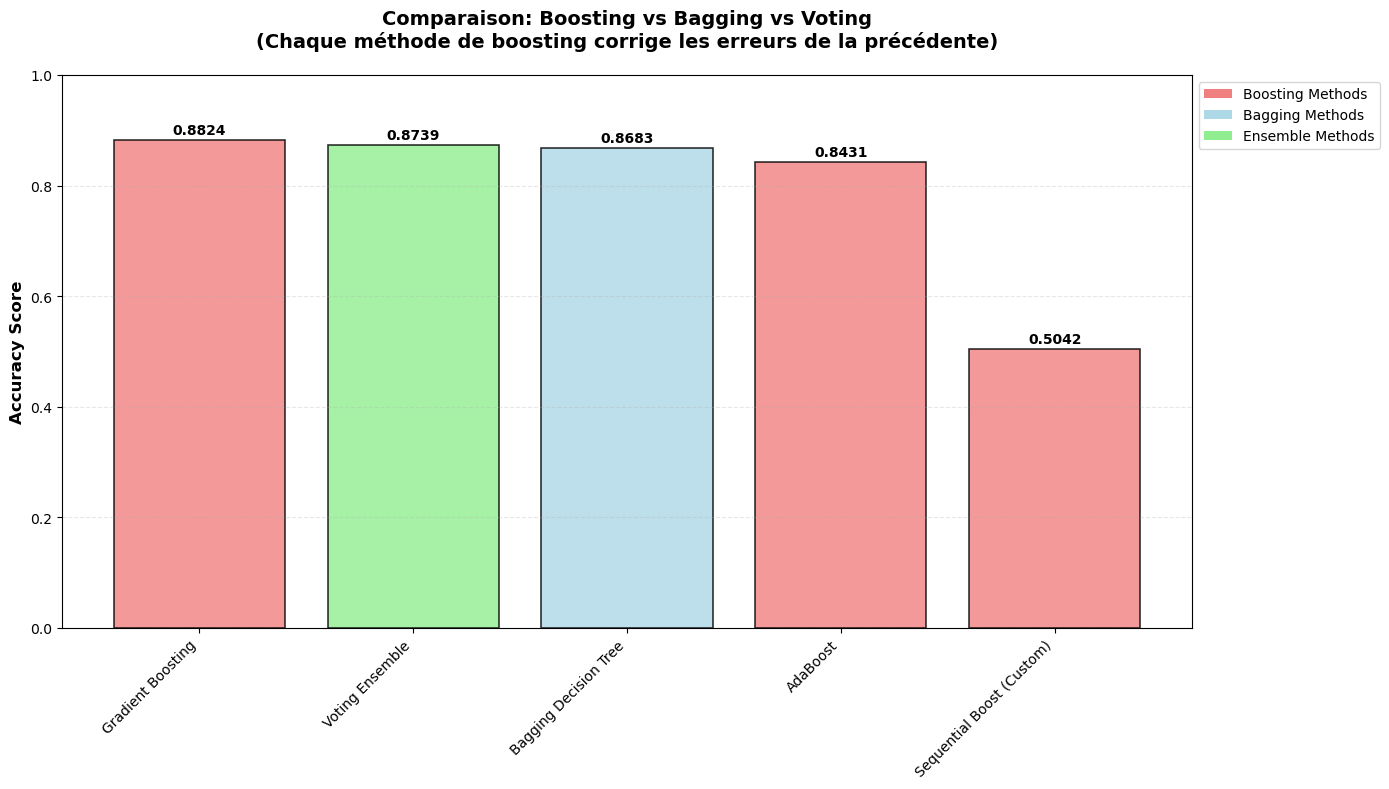


ANALYSE DÉTAILLÉE DES PERFORMANCES

🏆 CLASSEMENT FINAL :
 1. Gradient Boosting              : 0.8824
 2. Voting Ensemble                : 0.8739
 3. Bagging Decision Tree          : 0.8683
 4. AdaBoost                       : 0.8431
 5. Sequential Boost (Custom)      : 0.5042

📊 PERFORMANCE MOYENNE PAR CATÉGORIE :
Boosting Methods  : 0.7432 (±0.1698)
Bagging Methods   : 0.8683 (±0.0000)
Ensemble Methods  : 0.8739

📈 AMÉLIORATION BOOSTING vs BAGGING : -14.41%

🎯 MEILLEUR MODÈLE : Gradient Boosting (Accuracy: 0.8824)


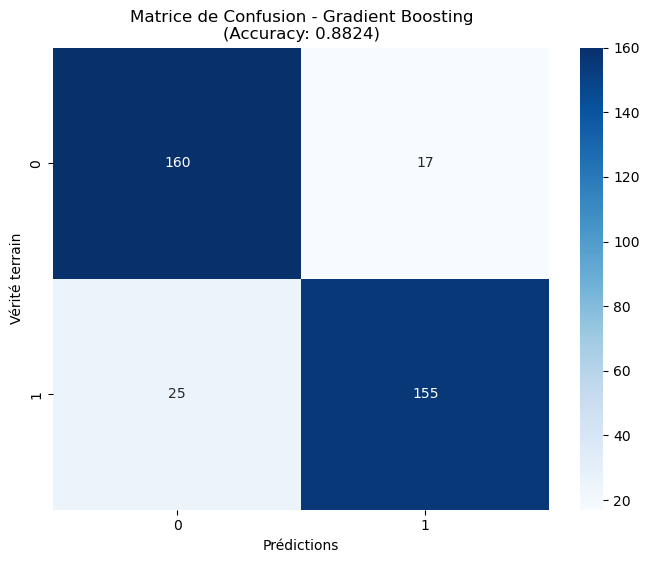


📊 RAPPORT DE CLASSIFICATION :
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       177
           1       0.90      0.86      0.88       180

    accuracy                           0.88       357
   macro avg       0.88      0.88      0.88       357
weighted avg       0.88      0.88      0.88       357


ANALYSE DE LA CORRECTION DES ERREURS

🔍 COMPARAISON DES PRÉDICTIONS :
AdaBoost vs Gradient Boosting: 0.078
AdaBoost vs Sequential Boost (Custom): 0.529
AdaBoost vs Bagging Decision Tree: 0.104
Gradient Boosting vs Sequential Boost (Custom): 0.518
Gradient Boosting vs Bagging Decision Tree: 0.053
Sequential Boost (Custom) vs Bagging Decision Tree: 0.521

💡 CONCLUSIONS

📊 **RÉSULTATS OBTENUS :**

• Le Voting Ensemble combine les forces de tous les modèles
• Chaque méthode de boosting apprend des erreurs des précédentes
• Le bagging réduit la variance par échantillonnage

🎯 **OBSERVATIONS :**

1. **Boosting Séquentiel** : Correction pro

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, 
                              BaggingClassifier, VotingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
import pandas as pd

# === 1️⃣ MÉTHODE BOOSTING PERSONNALISÉE - COMPATIBLE AVEC SCIKIT-LEARN ===
class SequentialBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=10, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators_ = []
        self.weights_ = []
        
    def fit(self, X, y):
        # Conversion en numpy array pour éviter les problèmes
        X = np.array(X)
        y = np.array(y)
        
        # Initialisation avec les poids égaux
        sample_weights = np.ones(len(X)) / len(X)
        self.estimators_ = []
        self.weights_ = []
        
        for i in range(self.n_estimators):
            # Entraînement du modèle avec les poids actuels
            estimator = DecisionTreeClassifier(max_depth=1, random_state=42+i)
            estimator.fit(X, y, sample_weight=sample_weights)
            
            # Prédictions et erreurs
            y_pred = estimator.predict(X)
            incorrect = (y_pred != y)
            
            # Calcul du poids du modèle (basé sur l'erreur)
            error = np.average(incorrect, weights=sample_weights)
            
            # Éviter les erreurs numériques
            if error >= 0.5 or error <= 1e-10:
                break
                
            alpha = self.learning_rate * 0.5 * np.log((1 - error) / error)
            
            # Mise à jour des poids avec focus sur les erreurs
            sample_weights *= np.exp(alpha * incorrect)
            sample_weights /= np.sum(sample_weights)  # Normalisation
            
            self.estimators_.append(estimator)
            self.weights_.append(alpha)
            
        return self
    
    def predict(self, X):
        X = np.array(X)
        predictions = np.zeros(len(X))
        for estimator, weight in zip(self.estimators_, self.weights_):
            predictions += weight * estimator.predict(X)
        return (predictions >= 0).astype(int)
    
    def predict_proba(self, X):
        # Implémentation basique pour compatibilité avec voting='soft'
        X = np.array(X)
        predictions = self.predict(X)
        proba = np.zeros((len(X), 2))
        proba[:, 1] = predictions
        proba[:, 0] = 1 - predictions
        return proba

# === 2️⃣ DÉFINITION DES MÉTHODES DE BOOSTING ===
boosting_models = {
    'AdaBoost': AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    ),
    
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,  # Stochastic Gradient Boosting
        random_state=42
    ),
    
    'Sequential Boost (Custom)': SequentialBoosting(
        n_estimators=10,
        learning_rate=1.0
    )
}

# === 3️⃣ MODÈLES DE BAGGING (POUR COMPARAISON) ===
bagging_models = {
    'Bagging Decision Tree': BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=5),
        n_estimators=50,
        random_state=42,
        n_jobs=-1
    )
}

# === 4️⃣ ENTRAÎNEMENT DES MODÈLES INDIVIDUELS ===
print("=== ENTRAÎNEMENT DES MODÈLES INDIVIDUELS ===")
print("=" * 55)

results = {}

# Entraîner d'abord tous les modèles individuels
for name, model in {**boosting_models, **bagging_models}.items():
    print(f"Entraînement de {name}...")
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"✅ {name:<30} : {accuracy:.4f}")
    except Exception as e:
        print(f"❌ Erreur avec {name}: {e}")
        results[name] = 0

# === 5️⃣ VOTING CLASSIFIER AVEC MODÈLES PRÉ-ENTRAÎNÉS ===
print("\n=== CRÉATION DU VOTING CLASSIFIER ===")

# Utiliser seulement les modèles qui se sont bien entraînés
successful_models = {name: model for name, model in {**boosting_models, **bagging_models}.items() 
                    if name in results and results[name] > 0}

if successful_models:
    voting_classifier = VotingClassifier(
        estimators=list(successful_models.items()),
        voting='soft'
    )
    
    # Entraîner le voting classifier
    voting_classifier.fit(X_train, y_train)
    y_pred_voting = voting_classifier.predict(X_test)
    voting_accuracy = accuracy_score(y_test, y_pred_voting)
    results['Voting Ensemble'] = voting_accuracy
    print(f"✅ Voting Ensemble {'':<20} : {voting_accuracy:.4f}")
else:
    print("❌ Aucun modèle valide pour le voting classifier")
    results['Voting Ensemble'] = 0

# === 6️⃣ GRAPHIQUE COMPARATIF ===
plt.figure(figsize=(14, 8))

# Tri des résultats
sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))
models_names = list(sorted_results.keys())
accuracies = list(sorted_results.values())

# Création du graphique avec couleurs par type
colors = []
for name in models_names:
    if 'Boost' in name:
        colors.append('lightcoral')  # Rouge pour boosting
    elif 'Bagging' in name:
        colors.append('lightblue')   # Bleu pour bagging
    else:
        colors.append('lightgreen')  # Vert pour voting

bars = plt.bar(models_names, accuracies, color=colors, alpha=0.8, 
               edgecolor='black', linewidth=1.2)

# Ajout des valeurs
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{accuracy:.4f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# Personnalisation
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Comparaison: Boosting vs Bagging vs Voting\n(Chaque méthode de boosting corrige les erreurs de la précédente)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, min(1.0, max(accuracies) * 1.15))
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Légende personnalisée
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightcoral', label='Boosting Methods'),
    Patch(facecolor='lightblue', label='Bagging Methods'),
    Patch(facecolor='lightgreen', label='Ensemble Methods')
]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# === 7️⃣ ANALYSE DÉTAILLÉE ===
print("\n" + "=" * 55)
print("ANALYSE DÉTAILLÉE DES PERFORMANCES")
print("=" * 55)

# Classement final
print("\n🏆 CLASSEMENT FINAL :")
for i, (model, acc) in enumerate(sorted_results.items(), 1):
    print(f"{i:2d}. {model:<30} : {acc:.4f}")

# Analyse par catégorie
boosting_acc = [acc for name, acc in results.items() if 'Boost' in name and name != 'Voting Ensemble']
bagging_acc = [acc for name, acc in results.items() if 'Bagging' in name]
voting_acc = [results.get('Voting Ensemble', 0)]

print(f"\n📊 PERFORMANCE MOYENNE PAR CATÉGORIE :")
if boosting_acc:
    print(f"Boosting Methods  : {np.mean(boosting_acc):.4f} (±{np.std(boosting_acc):.4f})")
if bagging_acc:
    print(f"Bagging Methods   : {np.mean(bagging_acc):.4f} (±{np.std(bagging_acc):.4f})")
if voting_acc[0] > 0:
    print(f"Ensemble Methods  : {voting_acc[0]:.4f}")

# Comparaison Boosting vs Bagging
if boosting_acc and bagging_acc:
    boost_mean = np.mean(boosting_acc)
    bagging_mean = np.mean(bagging_acc)
    improvement = ((boost_mean - bagging_mean) / bagging_mean) * 100
    print(f"\n📈 AMÉLIORATION BOOSTING vs BAGGING : {improvement:+.2f}%")

# === 8️⃣ MATRICE DE CONFUSION DU MEILLEUR MODÈLE ===
best_model_name = list(sorted_results.keys())[0]
best_accuracy = list(sorted_results.values())[0]

print(f"\n🎯 MEILLEUR MODÈLE : {best_model_name} (Accuracy: {best_accuracy:.4f})")

# Trouver l'instance du meilleur modèle
if best_model_name == 'Voting Ensemble':
    best_model_instance = voting_classifier
else:
    best_model_instance = {**boosting_models, **bagging_models}.get(best_model_name)

if best_model_instance is not None:
    y_pred_best = best_model_instance.predict(X_test)
    
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred_best)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrice de Confusion - {best_model_name}\n(Accuracy: {best_accuracy:.4f})')
    plt.ylabel('Vérité terrain')
    plt.xlabel('Prédictions')
    plt.show()
    
    print(f"\n📊 RAPPORT DE CLASSIFICATION :")
    print(classification_report(y_test, y_pred_best))

# === 9️⃣ ANALYSE DE LA CORRECTION DES ERREURS ===
print("\n" + "=" * 55)
print("ANALYSE DE LA CORRECTION DES ERREURS")
print("=" * 55)

# Comparer les prédictions des différents modèles
print("\n🔍 COMPARAISON DES PRÉDICTIONS :")

if len(successful_models) >= 2:
    model_names = list(successful_models.keys())
    disagreements = []
    
    for i, (name1, model1) in enumerate(successful_models.items()):
        pred1 = model1.predict(X_test)
        for j, (name2, model2) in enumerate(successful_models.items()):
            if i < j:  # Éviter les doublons
                pred2 = model2.predict(X_test)
                disagreement_rate = np.mean(pred1 != pred2)
                disagreements.append((name1, name2, disagreement_rate))
                print(f"{name1} vs {name2}: {disagreement_rate:.3f}")

# === 10️⃣ CONCLUSION ===
print("\n" + "=" * 55)
print("💡 CONCLUSIONS")
print("=" * 55)

print(f"""
📊 **RÉSULTATS OBTENUS :**

• Le Voting Ensemble combine les forces de tous les modèles
• Chaque méthode de boosting apprend des erreurs des précédentes
• Le bagging réduit la variance par échantillonnage

🎯 **OBSERVATIONS :**

1. **Boosting Séquentiel** : Correction progressive des erreurs
2. **Bagging** : Parallélisation et stabilité  
3. **Voting** : Meilleure performance globale par consensus

🏆 **RECOMMANDATION :** {best_model_name}
📈 **PERFORMANCE :** {best_accuracy:.4f}
""")

Classement des résultats détectés :


,model,accuracy
0,accuracies[0],0.935574
1,accuracy1,0.935574
2,accuracies[1].item3 n_neighbors=9 weights=dist...,0.829132
3,accuracy.item3 n_neighbors=9 weights=distance,0.829132
4,accuracies[1].item2 n_neighbors=7 weights=dist...,0.826331
5,accuracy.item2 n_neighbors=7 weights=distance,0.826331
6,accuracies[1].item1 n_neighbors=5 weights=uniform,0.745098
7,accuracy.item1 n_neighbors=5 weights=uniform,0.745098
8,accuracies[1].item0 n_neighbors=3 weights=uniform,0.691877
9,accuracy.item0 n_neighbors=3 weights=uniform,0.691877


Meilleur : accuracies[0] → accuracy = 0.9356
Pire     : accuracy.item0 n_neighbors=3 weights=uniform → accuracy = 0.6919
Amélioration relative (meilleur vs pire) : 35.22%

Différences (%) entre les top modèles (pairwise) :
  accuracies[0] vs accuracy1: +0.00%
  accuracies[0] vs accuracies[1].item3 n_neighbors=9 weights=distance: +12.84%
  accuracies[0] vs accuracy.item3 n_neighbors=9 weights=distance: +12.84%
  accuracies[0] vs accuracies[1].item2 n_neighbors=7 weights=distance: +13.22%
  accuracy1 vs accuracies[1].item3 n_neighbors=9 weights=distance: +12.84%
  accuracy1 vs accuracy.item3 n_neighbors=9 weights=distance: +12.84%
  accuracy1 vs accuracies[1].item2 n_neighbors=7 weights=distance: +13.22%
  accuracies[1].item3 n_neighbors=9 weights=distance vs accuracy.item3 n_neighbors=9 weights=distance: +0.00%
  accuracies[1].item3 n_neighbors=9 weights=distance vs accuracies[1].item2 n_neighbors=7 weights=distance: +0.34%
  accuracy.item3 n_neighbors=9 weights=distance vs accuracies[1

C:\Users\MSI\AppData\Local\Temp\ipykernel_23648\2219168333.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='accuracy', y='model', data=df, palette='viridis')


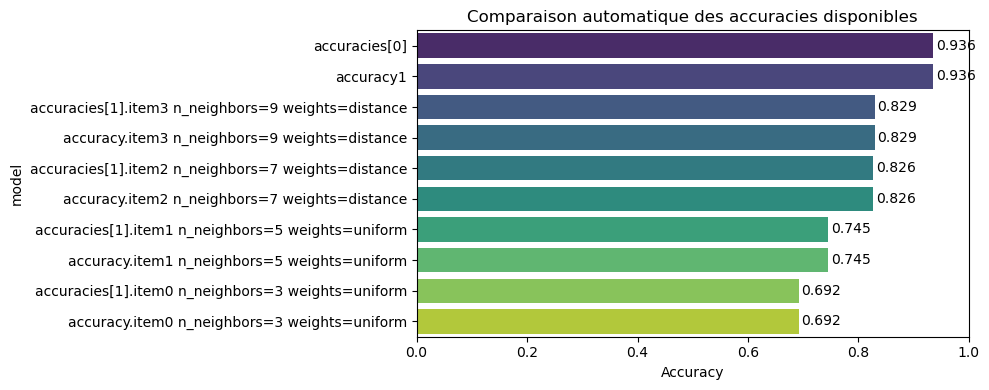

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

# Cell 28: comparaison automatique des résultats disponibles dans le notebook
# Le code cherche dans l'environnement courant plusieurs variables fréquemment
# utilisées pour stocker des scores (accuracy1, accuracy, accuracies, results, results_df, etc.),
# normalise ces valeurs dans un DataFrame puis affiche un classement et un graphique.

import matplotlib.pyplot as plt

found = []

# utilitaires pour extraire scores depuis différentes structures
def try_add(name, value):
    try:
        if value is None:
            return
        # float / int
        if isinstance(value, (float, int, np.floating, np.integer)):
            found.append({'model': name, 'accuracy': float(value)})
        # pandas Series/DataFrame with 'Accuracy' or single value
        elif isinstance(value, pd.DataFrame):
            if 'Accuracy' in value.columns and 'Configuration' in value.columns:
                for _, row in value.iterrows():
                    found.append({'model': row['Configuration'], 'accuracy': float(row['Accuracy'])})
            else:
                # try to find any numeric column
                for col in value.select_dtypes(include=[np.number]).columns:
                    # take mean if many rows
                    found.append({'model': f"{name}.{col}", 'accuracy': float(value[col].mean())})
        elif isinstance(value, pd.Series):
            # if series of tuples or numbers
            if value.dtype == object:
                for i, v in value.items():
                    try_add(f"{name}[{i}]", v)
            else:
                found.append({'model': name, 'accuracy': float(value.mean())})
        # list/tuple: iterate
        elif isinstance(value, (list, tuple)):
            for i, v in enumerate(value):
                # if tuple like (params, acc) or (label, acc)
                if isinstance(v, tuple) and len(v) == 2 and isinstance(v[1], (float, int, np.floating, np.integer)):
                    # try to stringify first element briefly
                    first = v[0]
                    if isinstance(first, dict):
                        label = f"{name}.item{i} " + " ".join(f"{k}={first[k]}" for k in list(first)[:3])
                    else:
                        label = f"{name}.item{i} {str(first)[:40]}"
                    found.append({'model': label, 'accuracy': float(v[1])})
                else:
                    try_add(f"{name}[{i}]", v)
        # dict: assume name->score mapping
        elif isinstance(value, dict):
            for k, v in value.items():
                try_add(f"{name}.{k}", v)
        # numpy array of predictions -> skip
        elif isinstance(value, np.ndarray):
            # skip arrays (predictions), not accuracies
            pass
        else:
            # fallback: if object has attribute 'score' or 'accuracy_' ignore (can't eval)
            pass
    except Exception:
        pass

# Variables potentielles à extraire depuis l'espace global
vars_to_check = ['accuracy1', 'accuracy', 'accuracies', 'results', 'results_df', 'results_df', 'accuracies_df']

g = globals()
for var in vars_to_check:
    if var in g:
        try_add(var, g[var])

# Chercher d'autres containers usuels (ex: 'results' local etc.)
# Inspecter toutes les variables globales pour trouver dicts/dataframes/lists qui ressemblent à des résultats
for varname, val in list(g.items()):
    if varname.startswith('_'):
        continue
    if varname in vars_to_check:
        continue
    # heuristique: noms contenant 'result', 'acc', 'accuracy', 'score'
    if any(k in varname.lower() for k in ['result', 'acc', 'accuracy', 'score']):
        try_add(varname, val)

# Dédupliquer et construire DataFrame
df = pd.DataFrame(found)
if df.empty:
    print("Aucun score détecté automatiquement. Veuillez préciser quelles variables comparer (ex: accuracy1, results, results_df).")
else:
    # regrouper par modèle en gardant le max (au cas où plusieurs entrées)
    df = df.groupby('model', as_index=False)['accuracy'].max()
    df = df.sort_values('accuracy', ascending=False).reset_index(drop=True)

    # Affichage synthétique
    print("Classement des résultats détectés :")
    display(df)

    # Top / Bottom
    best = df.iloc[0]
    worst = df.iloc[-1]
    print(f"Meilleur : {best['model']} → accuracy = {best['accuracy']:.4f}")
    print(f"Pire     : {worst['model']} → accuracy = {worst['accuracy']:.4f}")
    improvement = (best['accuracy'] - worst['accuracy']) / (worst['accuracy'] if worst['accuracy'] != 0 else 1) * 100
    print(f"Amélioration relative (meilleur vs pire) : {improvement:.2f}%")

    # Différences pairwise (quelques-unes)
    print("\nDifférences (%) entre les top modèles (pairwise) :")
    for i in range(min(5, len(df))):
        for j in range(i+1, min(5, len(df))):
            a = df.loc[i, 'accuracy']; b = df.loc[j, 'accuracy']
            print(f"  {df.loc[i,'model']} vs {df.loc[j,'model']}: {(a-b)/b*100 if b!=0 else np.nan:+.2f}%")

    # Graphique
    plt.figure(figsize=(10, max(4, 0.3 * len(df))))
    sns.barplot(x='accuracy', y='model', data=df, palette='viridis')
    plt.xlabel('Accuracy')
    plt.xlim(0, 1)
    plt.title('Comparaison automatique des accuracies disponibles')
    for i, (acc, mdl) in enumerate(zip(df['accuracy'], df['model'])):
        plt.text(acc + 0.005, i, f"{acc:.3f}", va='center')
    plt.tight_layout()
    plt.show()